In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')


df_train = pd.read_csv('/content/drive/MyDrive/FACENS/2025/IA_AC1_DATASETS/data-train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/FACENS/2025/IA_AC1_DATASETS/data-test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
pd.set_option('display.float_format', '{:.4f}'.format)
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
incidencerate,303.0000,449.8117,55.7050,201.3000,418.9500,453.7000,480.9000,718.9000
medincome,303.0000,47738.7426,10974.6478,24265.0000,39854.0000,46196.0000,53861.0000,85885.0000
povertypercent,303.0000,16.6809,6.4135,4.0000,11.7000,15.7000,20.2000,47.0000
binnedinc,303.0000,50052.9167,16671.0559,28429.0500,38888.2500,46611.3000,52796.0000,93564.7500
medianage,303.0000,40.5875,5.3853,23.5000,37.2000,40.7000,43.5000,56.4000
medianagemale,303.0000,39.3927,5.4615,24.3000,35.9500,39.6000,42.1000,58.5000
medianagefemale,303.0000,41.8040,5.4428,22.8000,38.4500,42.1000,44.9000,56.8000
avghouseholdsize,303.0000,2.6423,2.0810,0.0237,2.3700,2.5000,2.6300,28.0000
percentmarried,303.0000,52.0007,6.6011,28.1000,47.8500,52.7000,56.8500,66.3000
pctnohs18_24,303.0000,18.1366,7.9602,1.6000,13.2000,16.9000,22.3000,58.2000


In [99]:
#Verificar os tipos e colunas no Dataset e dados faltantes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742 entries, 0 to 2741
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              2742 non-null   float64
 1   avgdeathsperyear         2742 non-null   int64  
 2   incidencerate            2742 non-null   float64
 3   medincome                2742 non-null   int64  
 4   popest2015               2742 non-null   int64  
 5   povertypercent           2742 non-null   float64
 6   studypercap              2742 non-null   float64
 7   binnedinc                2742 non-null   object 
 8   medianage                2742 non-null   float64
 9   medianagemale            2742 non-null   float64
 10  medianagefemale          2742 non-null   float64
 11  geography                2742 non-null   object 
 12  avghouseholdsize         2742 non-null   float64
 13  percentmarried           2742 non-null   float64
 14  pctnohs18_24            

In [71]:
#Soma da quantidade de dados faltantes
df_train.isnull().sum()

,0
avganncount,0
avgdeathsperyear,0
incidencerate,0
medincome,0
popest2015,0
povertypercent,0
studypercap,0
binnedinc,0
medianage,0
medianagemale,0


In [100]:
#Selecionar e ver só os dados faltantes
df_train[['pctsomecol18_24','pctemployed16_over', 'pctprivatecoveragealone']]

,pctsomecol18_24,pctemployed16_over,pctprivatecoveragealone
0,37.3000,47.0000,45.1000
1,NaN,63.9000,54.7000
2,NaN,56.4000,59.7000
3,NaN,43.8000,55.8000
4,NaN,54.6000,49.1000
...,...,...,...
2737,NaN,61.7000,55.2000
2738,NaN,62.8000,61.9000
2739,NaN,72.4000,58.4000
2740,NaN,NaN,NaN


In [101]:
df_train = df_train.drop(['pctsomecol18_24'], axis = 1) #Drop da coluna 2056 dados faltantes

df_train['pctemployed16_over'] = df_train['pctemployed16_over'].fillna(df_train['pctemployed16_over'].mean())
df_train['pctprivatecoveragealone'] = df_train['pctprivatecoveragealone'].fillna(df_train['pctprivatecoveragealone'].mean())

df_train.isnull().sum()

,0
avganncount,0
avgdeathsperyear,0
incidencerate,0
medincome,0
popest2015,0
povertypercent,0
studypercap,0
binnedinc,0
medianage,0
medianagemale,0


In [102]:
#Realizar o tratamento com os dados de Objeto Geography

df_train['state'] = df_train['geography'].apply(lambda x: x.split(",")[-1].strip())
df_train = df_train.drop('geography', axis=1)

#Aplicar o One Hot Encoding
df_train = pd.get_dummies(df_train, columns=['state'])

In [103]:
#Para o binnedinc, existem duas formas
# 1- Tratar como min e máximo
# 2 - Pegar a média dos valores (Acredito trazer um contexto melhor)

df_train['binnedinc'] = df_train['binnedinc'].str.replace('(', '')
df_train['binnedinc'] = df_train['binnedinc'].str.replace(')', '')
df_train['binnedinc'] = df_train['binnedinc'].str.replace('[', '')
df_train['binnedinc'] = df_train['binnedinc'].str.replace(']', '')

# Cria duas novas colunas para os valores mínimos e máximos
df_train[['binnedinc_min', 'binnedinc_max']] = df_train['binnedinc'].str.split(',', expand=True)

df_train['binnedinc_min'] = df_train['binnedinc_min'].astype(float)
df_train['binnedinc_max'] = df_train['binnedinc_max'].astype(float)

# Calcula média
df_train['binnedinc'] = (df_train['binnedinc_min'] + df_train['binnedinc_max']) / 2
df_train = df_train.drop(columns=['binnedinc_min', 'binnedinc_max'])

In [104]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
avganncount,2742.0000,615.8570,1433.5706,6.0000,76.0000,173.0000,532.7500,38150.0000
avgdeathsperyear,2742.0000,187.9767,510.9437,3.0000,28.0000,61.0000,151.0000,14010.0000
incidencerate,2742.0000,448.1200,54.4408,211.1000,420.4250,453.5494,480.8000,1206.9000
medincome,2742.0000,46988.5821,12152.2993,22640.0000,38750.5000,45080.0000,52386.5000,125635.0000
popest2015,2742.0000,103300.9165,332512.8723,827.0000,11660.2500,26710.0000,69524.5000,10170292.0000
povertypercent,2742.0000,16.9001,6.4069,3.2000,12.2000,15.9000,20.4000,47.4000
studypercap,2742.0000,160.2813,547.9792,0.0000,0.0000,0.0000,87.2280,9762.3090
binnedinc,2742.0000,48749.7289,16915.1291,28429.0500,38888.2500,43962.7000,52796.0000,93564.7500
medianage,2742.0000,45.4550,46.0573,22.3000,37.8000,41.0000,44.1000,624.0000
medianagemale,2742.0000,39.5890,5.2017,22.4000,36.4000,39.5500,42.6000,64.7000


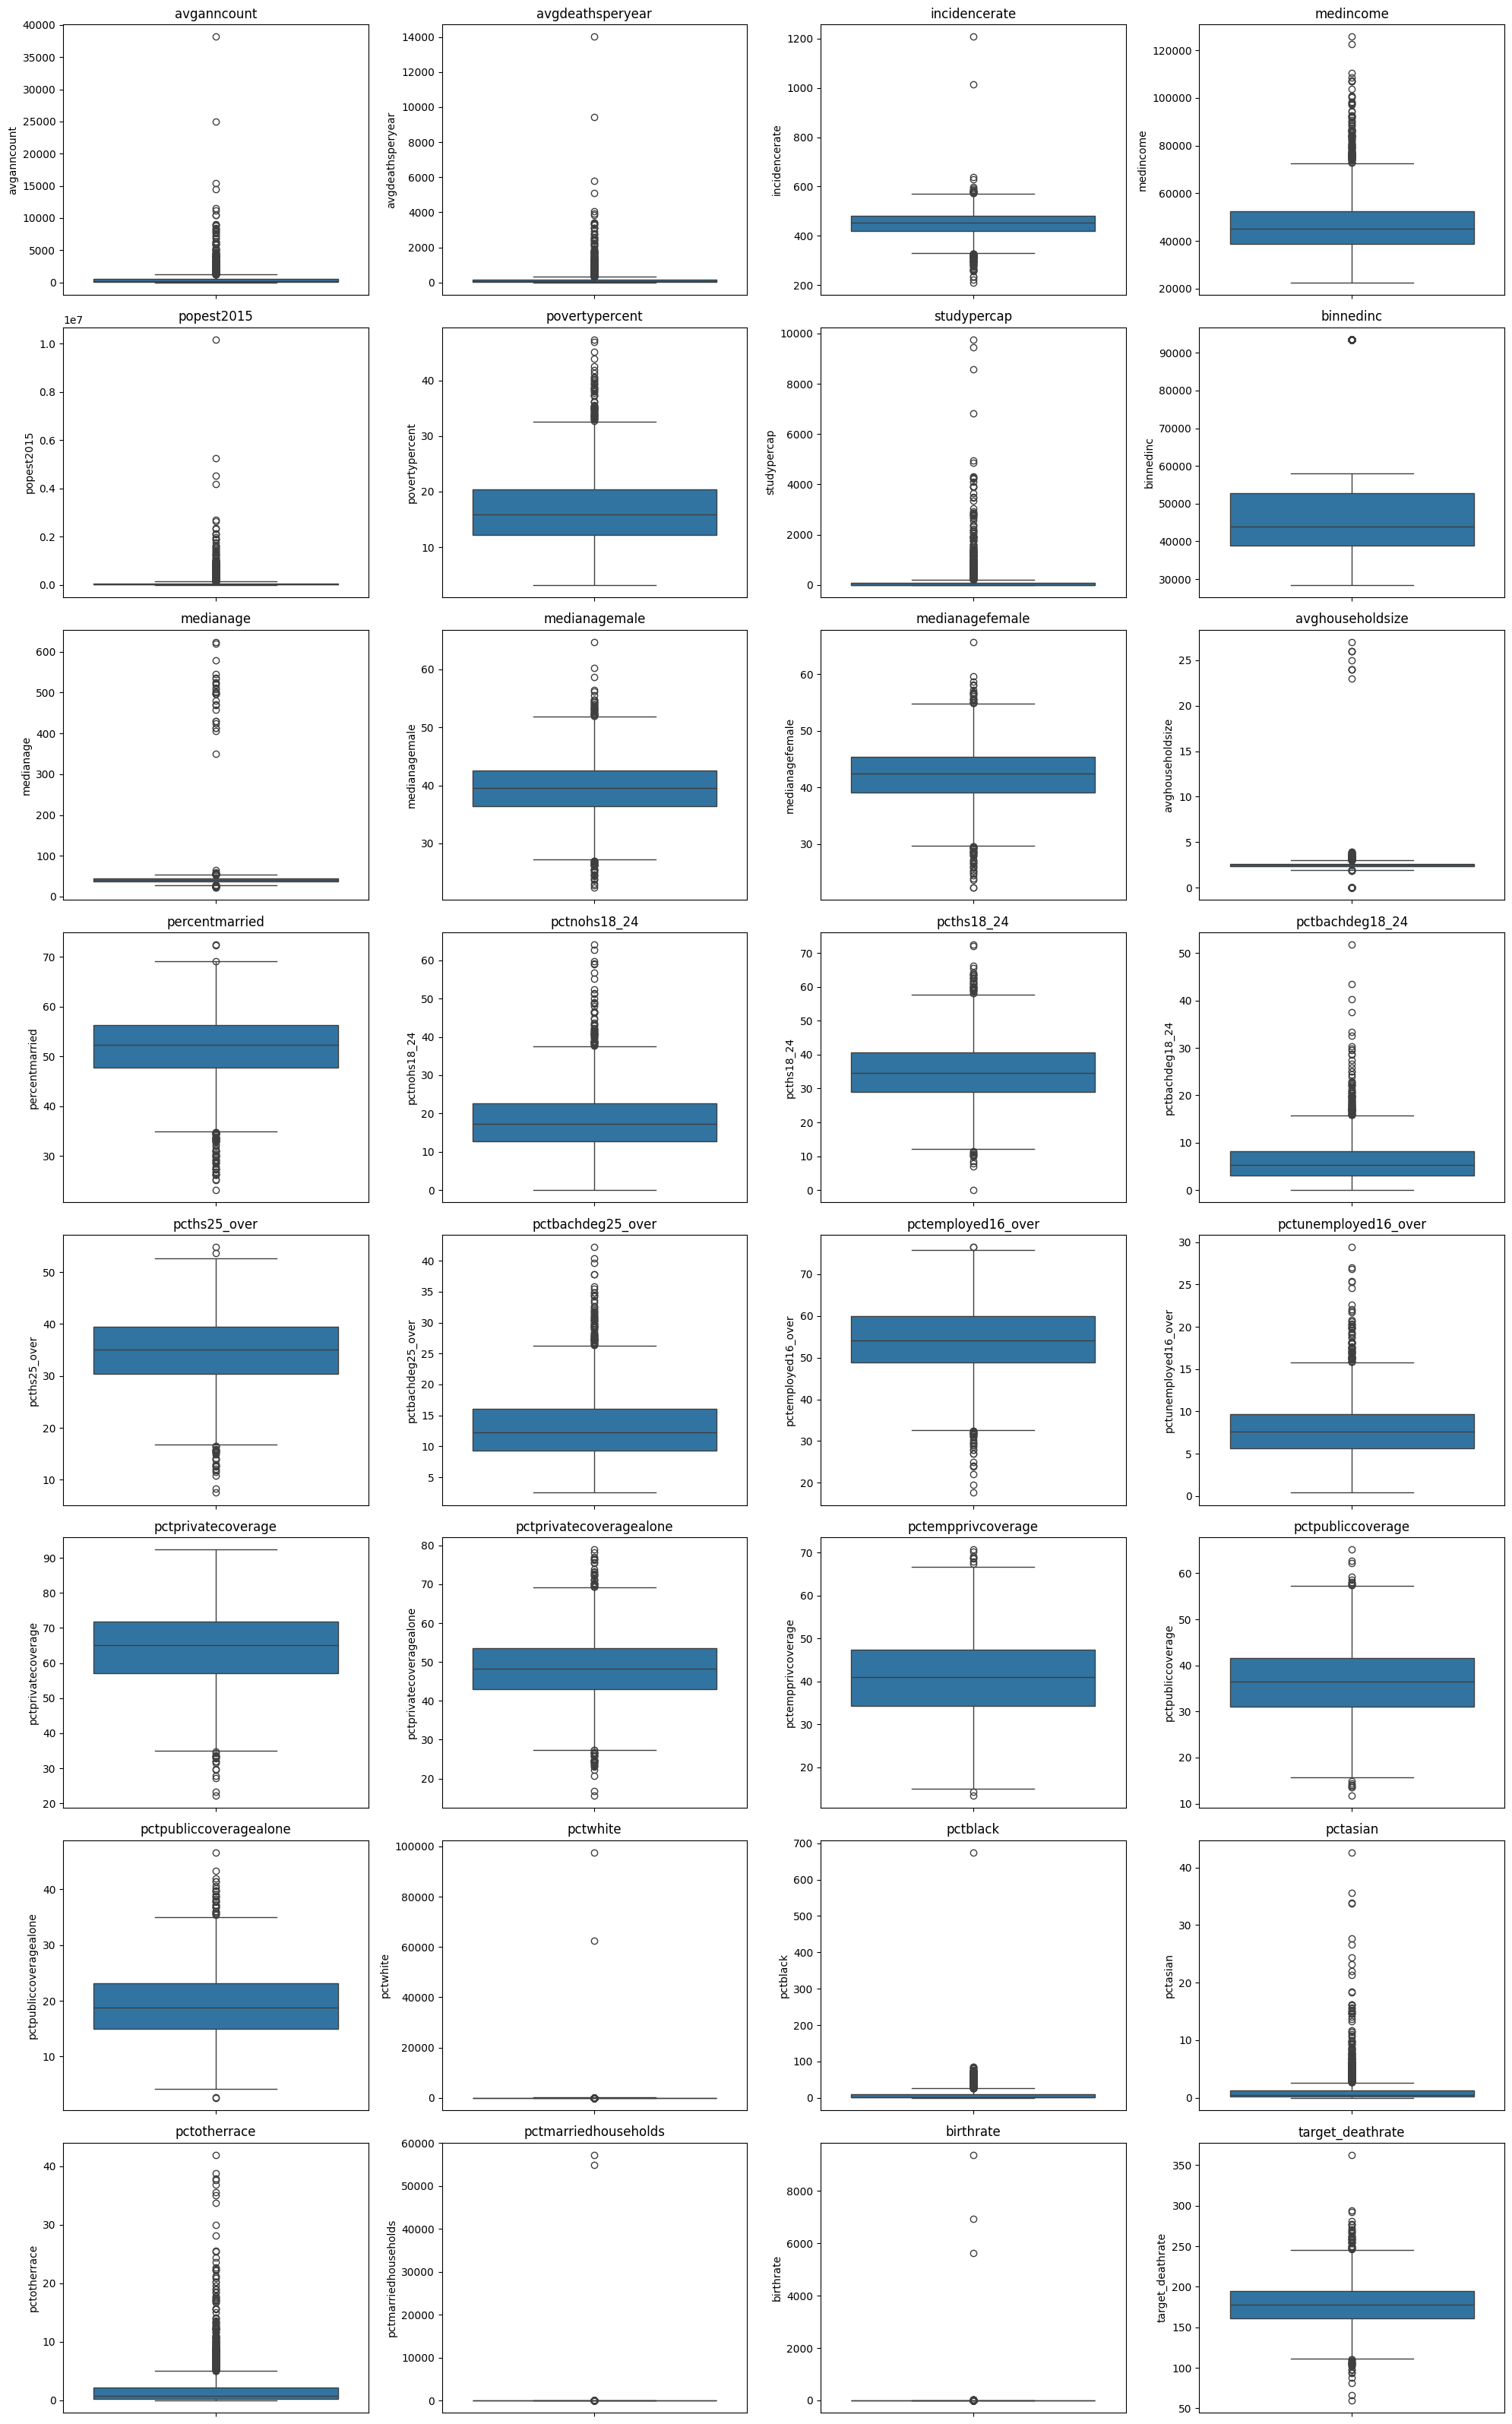

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

#Boxplots das variaveis
numeric_cols = df_train.select_dtypes(include='number').columns


n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df_train[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [106]:
#Tratar Outliers com np.log1

df_train['avganncount_log'] = np.log1p(df_train['avganncount'])
df_train['avgdeathsperyear_log'] = np.log1p(df_train['avgdeathsperyear'])
df_train['studypercap_log'] = np.log1p(df_train['studypercap'])
df_train['popest2015_log'] = np.log1p(df_train['popest2015'])
df_train['birthrate_log'] = np.log1p(df_train['birthrate'])

df_train['pctwhite_log'] = np.log1p(df_train['pctwhite'])
df_train['pctasian_log'] = np.log1p(df_train['pctasian'])
df_train['pctblack_log'] = np.log1p(df_train['pctblack'])
df_train['pctotherrace_log'] = np.log1p(df_train['pctotherrace'])
df_train['pctmarriedhouseholds_log'] = np.log1p(df_train['pctmarriedhouseholds'])

In [107]:
#Retirar as colunas que foram tratadas com log
df_train.drop(['avganncount',
               'avgdeathsperyear',
               'studypercap',
               'popest2015',
               'birthrate',
               'pctwhite',
               'pctasian',
               'pctblack',
               'pctotherrace',
               'pctmarriedhouseholds'], axis=1, inplace=True)

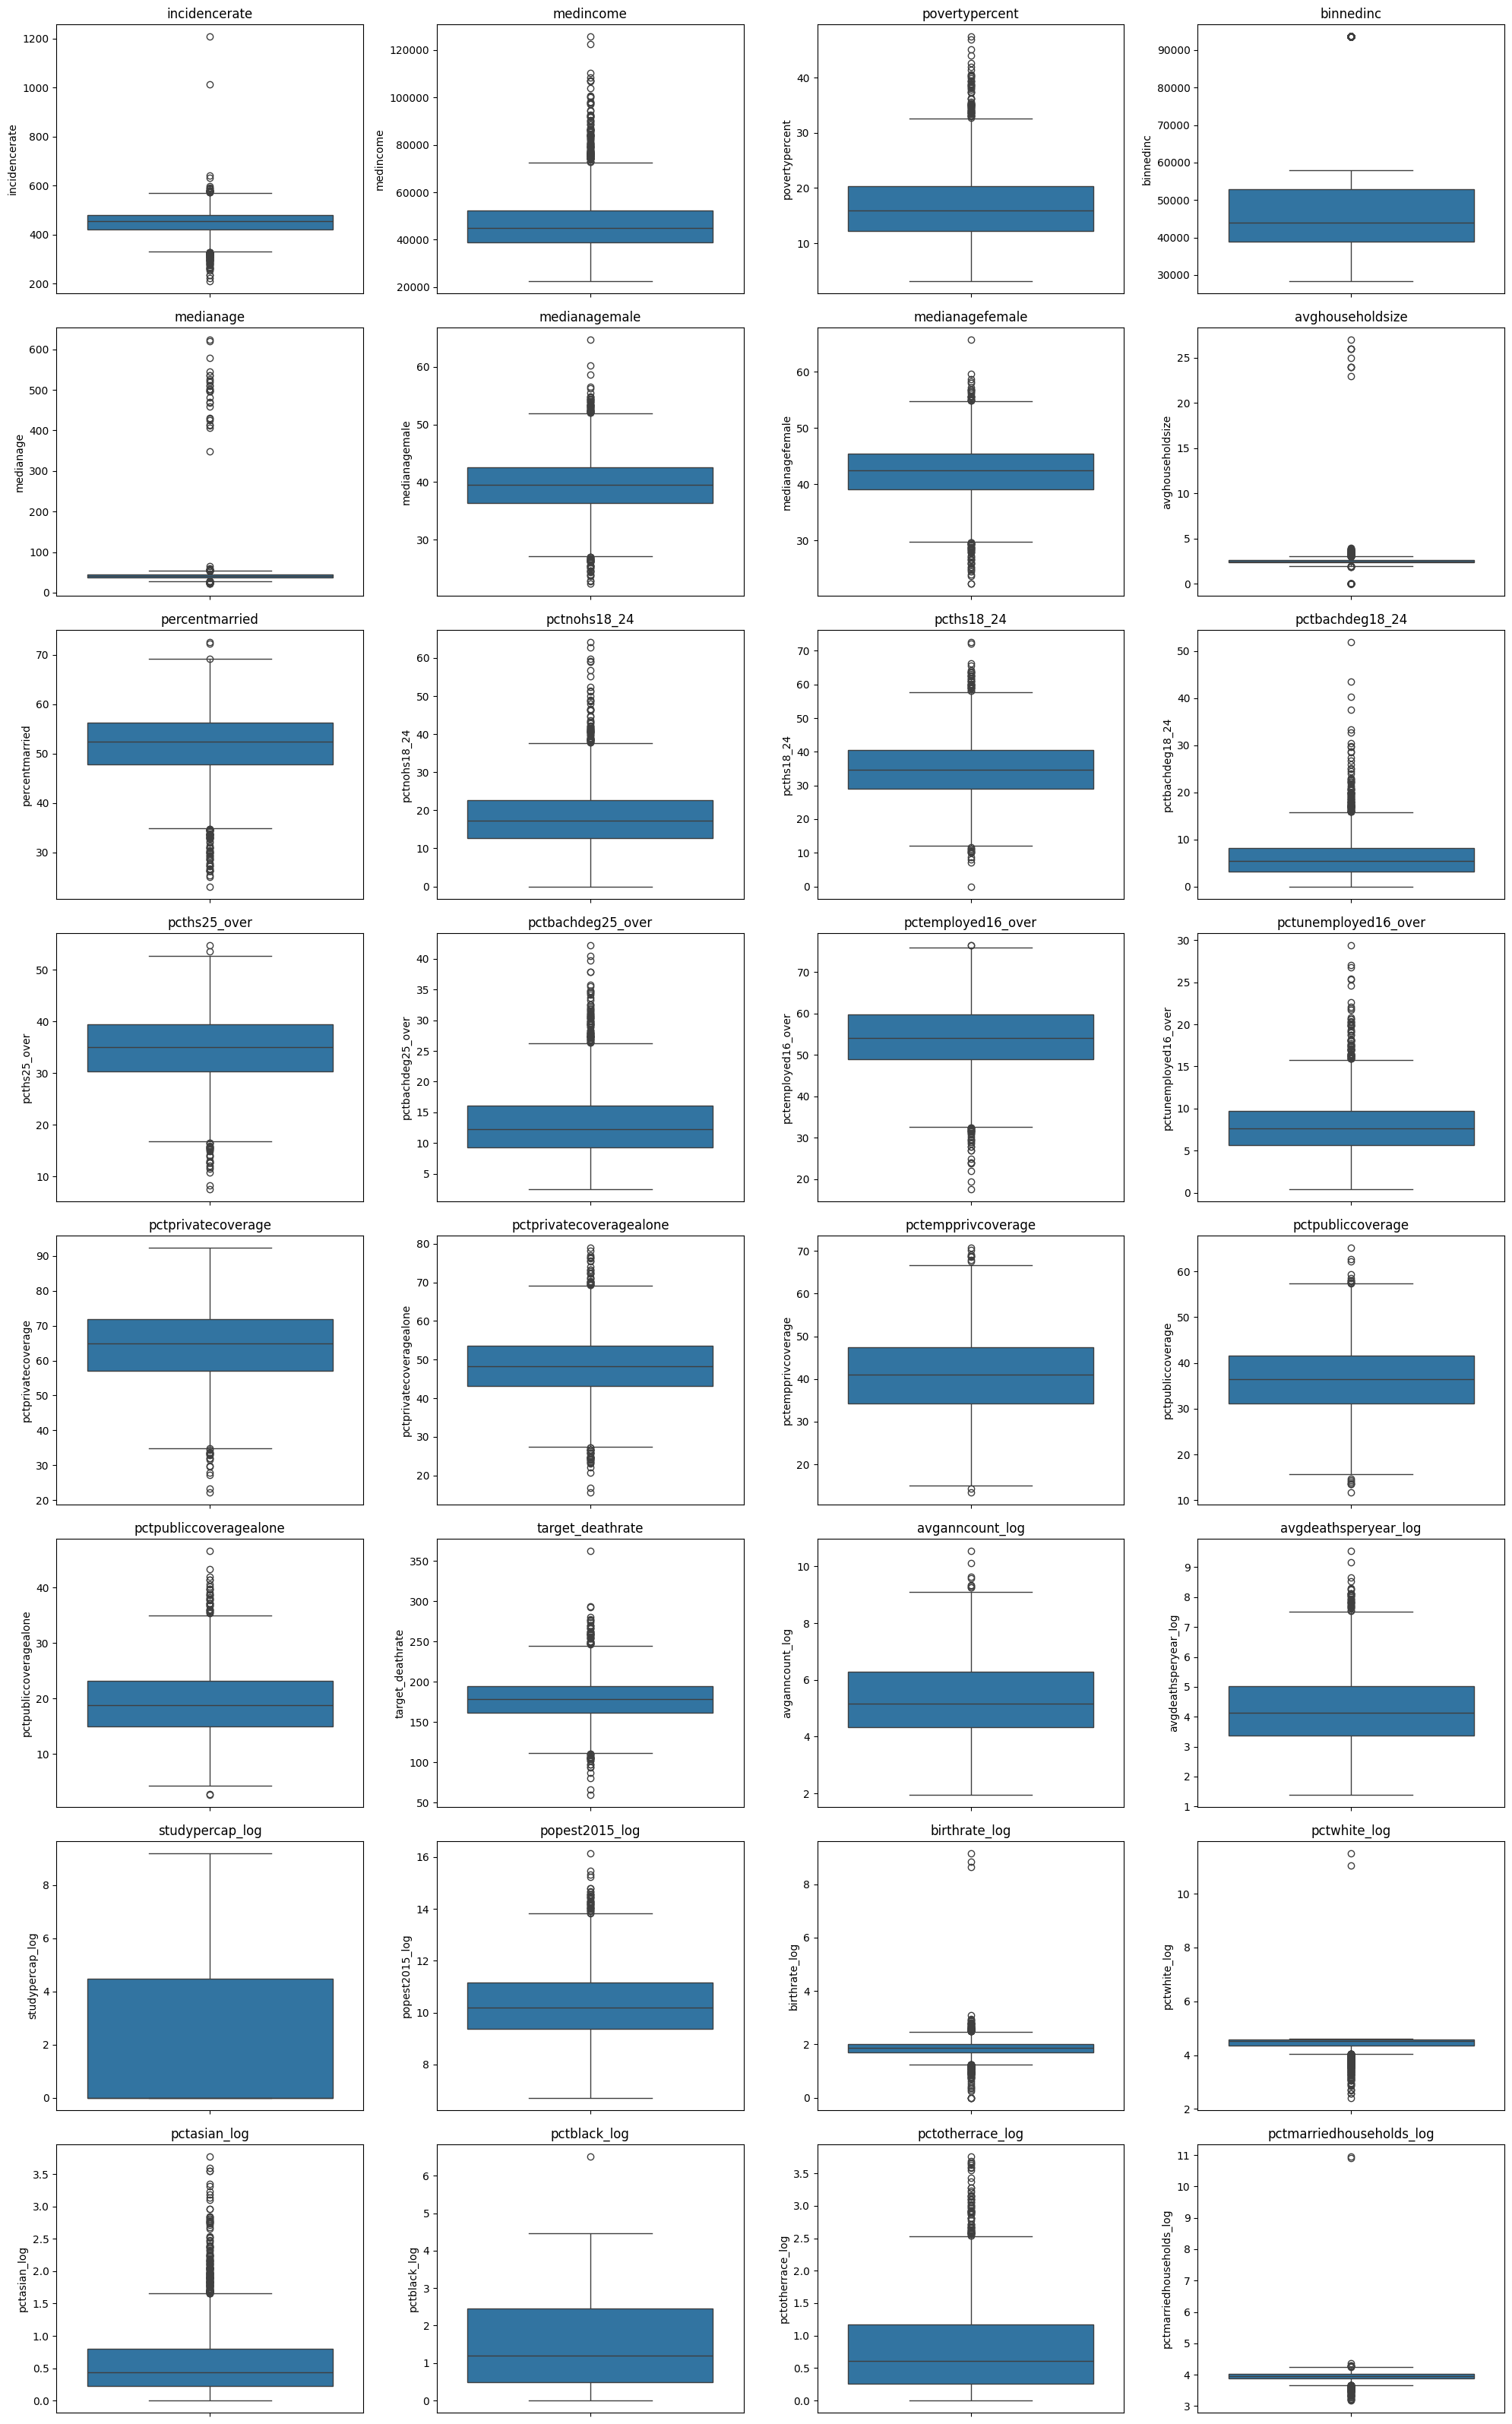

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

#Boxplots das variaveis
numeric_cols = df_train.select_dtypes(include='number').columns


n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df_train[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [109]:
#Outro ponto visualizado no Describe é que o mediange possui valores acima de 100 anos de idade
#E pelo gráfico, aparenta ter mais outliers, por isso vamos ver quantos existem
out_medianage = df_train[df_train['medianage'] > 100]
print(out_medianage['medianage'].values)

[502.8 414.  406.8 508.8 619.2 501.6 498.  430.8 535.2 349.2 412.8 511.2
 496.8 458.4 496.8 519.6 525.6 470.4 424.8 429.6 469.2 546.  481.2 624.
 523.2 498.  536.4 579.6]


In [110]:
#A coluna Medianage precisa de um tratamento a mais
#Existem duas opções, aplicar um pré-processamento para tratar esses dados altos, imaginando que seja um erro de casas decimal
#df_train.loc[df_train['medianage'] > 100, 'medianage'] = df_train['medianage'] / 10
#df_train.describe().transpose()

#Ou remover as linhas, que é o mais correto a ser feito do que modificar sem ter certeza do erro
df_train = df_train[df_train['medianage'] <= 120] #Uma pesquisa rápida mostrou que 115 foi a idade mais velha dos EUA, abaixo disso considero um outlier

In [111]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2714 entries, 0 to 2741
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   incidencerate               2714 non-null   float64
 1   medincome                   2714 non-null   int64  
 2   povertypercent              2714 non-null   float64
 3   binnedinc                   2714 non-null   float64
 4   medianage                   2714 non-null   float64
 5   medianagemale               2714 non-null   float64
 6   medianagefemale             2714 non-null   float64
 7   avghouseholdsize            2714 non-null   float64
 8   percentmarried              2714 non-null   float64
 9   pctnohs18_24                2714 non-null   float64
 10  pcths18_24                  2714 non-null   float64
 11  pctbachdeg18_24             2714 non-null   float64
 12  pcths25_over                2714 non-null   float64
 13  pctbachdeg25_over           2714 non-n

In [84]:
#Aplicar normalização antes de verificar o PCA
from sklearn.preprocessing import StandardScaler

# Seleciona apenas as colunas numéricas (todas as que o modelo vai usar)
numeric_cols = df_train.select_dtypes(include='number').columns

scaler = StandardScaler()
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])



In [85]:
#Só confirmar se não existem dados vazios
df_train.isnull().sum()

,0
incidencerate,0
medincome,0
povertypercent,0
binnedinc,0
medianage,0
...,...
pctwhite_log,0
pctasian_log,0
pctblack_log,0
pctotherrace_log,0


In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

y = df_train['target_deathrate']
X = df_train.drop('target_deathrate', axis=1)


# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=28)
X_pca = pca.fit_transform(X_scaled)

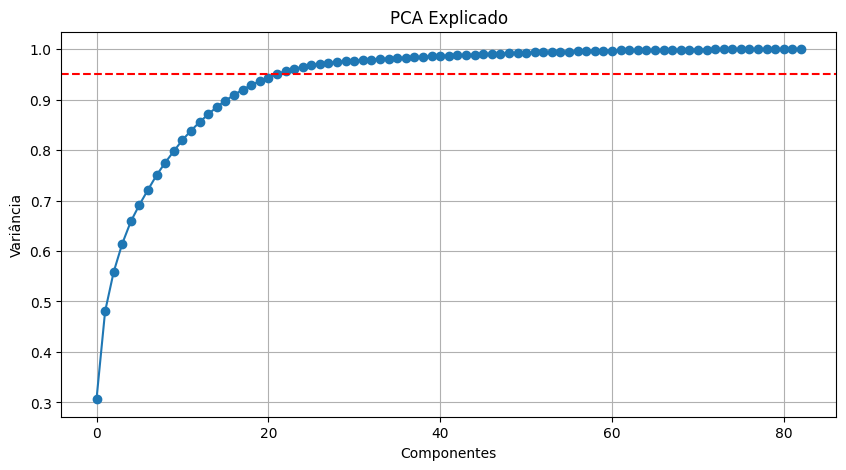

In [62]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Componentes')
plt.ylabel('Variância')
plt.title('PCA Explicado')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')  # Linha de 95%
plt.show()

A linha de 95% de variância é cruzada por volta do componente 20-30 (acredito ser por volta 26 componentes).

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=305, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [2714, 303]

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("LinearRegression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

LinearRegression:
MSE: 0.4800651685437306
R²: 0.5051701160361033


In [66]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, y_train)

y_pred_sgd = sgd.predict(X_test)

print("SGDRegressor:")
print("MSE:", mean_squared_error(y_test, y_pred_sgd))
print("R²:", r2_score(y_test, y_pred_sgd))

SGDRegressor:
MSE: 0.4818558975464847
R²: 0.5033243120021811


In [86]:
#SEM PCA
y = df_train['target_deathrate']
X = df_train.drop('target_deathrate', axis=1)


In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=305, random_state=42)

In [89]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("LinearRegression (sem PCA):")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

# SGD Regressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

print("SGDRegressor (sem PCA):")
print("MSE:", mean_squared_error(y_test, y_pred_sgd))
print("R²:", r2_score(y_test, y_pred_sgd))

LinearRegression (sem PCA):
MSE: 0.20467595736582306
R²: 0.7890291009015294
SGDRegressor (sem PCA):
MSE: 0.40701559967161355
R²: 0.5804663717470812


In [27]:
def preprocessamento_padrao(df):
    import numpy as np
    import pandas as pd

    # 1. Remover coluna com muitos valores faltantes
    if 'pctsomecol18_24' in df.columns:
        df = df.drop(['pctsomecol18_24'], axis=1)

    # 2. Preencher valores ausentes com média
    for col in ['pctemployed16_over', 'pctprivatecoveragealone']:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mean())

    # 3. Separar estado e aplicar One Hot Encoding
    if 'geography' in df.columns:
        df['state'] = df['geography'].apply(lambda x: x.split(",")[-1].strip())
        df = df.drop('geography', axis=1)
        df = pd.get_dummies(df, columns=['state'])

    # 4. Tratar binnedinc (usar média do intervalo)
    if 'binnedinc' in df.columns:
        df['binnedinc'] = df['binnedinc'].str.replace('(', '')
        df['binnedinc'] = df['binnedinc'].str.replace(')', '')
        df['binnedinc'] = df['binnedinc'].str.replace('[', '')
        df['binnedinc'] = df['binnedinc'].str.replace(']', '')
        df[['binnedinc_min', 'binnedinc_max']] = df['binnedinc'].str.split(',', expand=True)
        df['binnedinc_min'] = df['binnedinc_min'].astype(float)
        df['binnedinc_max'] = df['binnedinc_max'].astype(float)
        df['binnedinc'] = (df['binnedinc_min'] + df['binnedinc_max']) / 2
        df = df.drop(columns=['binnedinc_min', 'binnedinc_max'])

    # 5. Aplicar log1p nas colunas com outliers
    df['avganncount_log'] = np.log1p(df['avganncount'])
    df['avgdeathsperyear_log'] = np.log1p(df['avgdeathsperyear'])
    df['studypercap_log'] = np.log1p(df['studypercap'])
    df['popest2015_log'] = np.log1p(df['popest2015'])
    df['birthrate_log'] = np.log1p(df['birthrate'])

    #
    #df['pctwhite_log'] = np.log1p(df['pctwhite'])
    #df['pctasian_log'] = np.log1p(df['pctasian'])
    #df['pctblack_log'] = np.log1p(df['pctblack'])
    #df['pctotherrace_log'] = np.log1p(df['pctotherrace'])
    df['pctmarriedhouseholds_log'] = np.log1p(df['pctmarriedhouseholds'])
    # 6. Remover outliers visíveis de idade
    if 'medianage' in df.columns:
        df = df[df['medianage'] <= 120]

    return df

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold

# 1. Carregar os dados
df_train = pd.read_csv('/content/drive/MyDrive/FACENS/2025/IA_AC1_DATASETS/data-train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/FACENS/2025/IA_AC1_DATASETS/data-test.csv')

# 2. Pré-processamento
df_train = preprocessamento_padrao(df_train)
df_test = preprocessamento_padrao(df_test)

# 3. Separar X e y
y_train = df_train['target_deathrate']
X_train = df_train.drop('target_deathrate', axis=1)



y_test = df_test['target_deathrate']
X_test = df_test.drop('target_deathrate', axis=1)

#Teste simplificando o modelo.
#X_train = df_train[['medincome', 'povertypercent', 'medianage']]
#y_train = df_train['target_deathrate']
#X_test = df_test[['medincome', 'povertypercent', 'medianage']]
#y_test = df_test['target_deathrate']

# 4. Alinhar colunas do teste com as do treino
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0
for col in X_test.columns:
    if col not in X_train.columns:
        X_test = X_test.drop(columns=col)
X_test = X_test[X_train.columns]  # reordenar colunas

# 5. Padronizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Treinar modelos
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# 6.1 Validação cruzada - LinearRegression
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# R²
r2_scores = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=kfold, scoring='r2')
print("\n[Cross-Validation - LinearRegression]")
print("R² em cada fold:", r2_scores)
print("R² médio (cross-val):", r2_scores.mean())

# MSE
mse_scorer = make_scorer(mean_squared_error)
mse_scores = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=kfold, scoring=mse_scorer)
print("MSE em cada fold:", mse_scores)
print("MSE médio (cross-val):", mse_scores.mean())

# 6.2 SGDRegressor com ajustes
sgd = SGDRegressor(
    max_iter=2000,           #n_interações
    tol=1e-3,               # Reduzir a tolerância para parada
    penalty='l1',   # Combinação L1 + L2 para estabilidade
    alpha=0.001,           # Reduzir a força da regularização
    learning_rate='adaptive',  # Taxa de aprendizado adaptativa
    eta0=0.001,             # Taxa de aprendizado inicial menor
    random_state=42
)
sgd.fit(X_train_scaled, y_train)

# 7. Prever
y_pred_train_lr = lr.predict(X_train_scaled)
y_pred_test_lr = lr.predict(X_test_scaled)

y_pred_train_sgd = sgd.predict(X_train_scaled)
y_pred_test_sgd = sgd.predict(X_test_scaled)

# 8. Avaliar
print("\n=== LinearRegression ===")
print("Treino - MSE:", mean_squared_error(y_train, y_pred_train_lr))
print("Treino - R²:", r2_score(y_train, y_pred_train_lr))
print("Teste  - MSE:", mean_squared_error(y_test, y_pred_test_lr))
print("Teste  - R²:", r2_score(y_test, y_pred_test_lr))

print("\n=== SGDRegressor ===")
print("Treino - MSE:", mean_squared_error(y_train, y_pred_train_sgd))
print("Treino - R²:", r2_score(y_train, y_pred_train_sgd))
print("Teste  - MSE:", mean_squared_error(y_test, y_pred_test_sgd))
print("Teste  - R²:", r2_score(y_test, y_pred_test_sgd))



[Cross-Validation - LinearRegression]
R² em cada fold: [0.80416587 0.78064909 0.81153999 0.81463898 0.78465651 0.77026559
 0.80496803 0.81917716 0.80414708 0.83476654]
R² médio (cross-val): 0.8028974848981816
MSE em cada fold: [148.13849488 165.98144465 138.95293409 158.0830209  146.42110274
 173.68206974 149.88126722 135.1160985  150.97112311 136.76279187]
MSE médio (cross-val): 150.3990347693919

=== LinearRegression ===
Treino - MSE: 135.67344712067268
Treino - R²: 0.823313437943972
Teste  - MSE: 191.17136003913646
Teste  - R²: 0.75487000877489

=== SGDRegressor ===
Treino - MSE: 147.92636688587638
Treino - R²: 0.8073565479672868
Teste  - MSE: 208.51657785745138
Teste  - R²: 0.7326290565175502


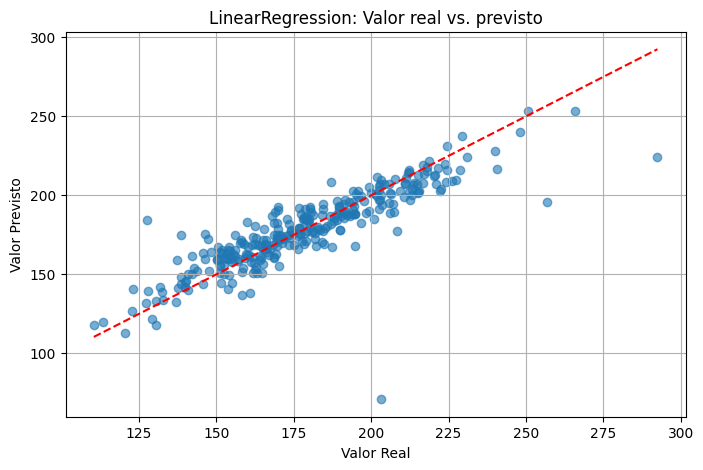

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # linha ideal
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('LinearRegression: Valor real vs. previsto')
plt.grid(True)
plt.show()

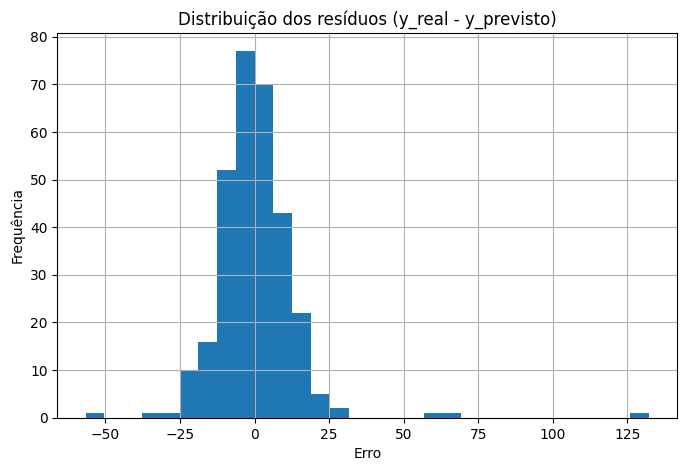

In [24]:
residuos = y_test - y_pred_test_lr

plt.figure(figsize=(8, 5))
plt.hist(residuos, bins=30)
plt.title('Distribuição dos resíduos (y_real - y_previsto)')
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [ ]:
# Criar DataFrame com valores reais e previstos
comparacao = pd.DataFrame({
    'Valor Real': y_test.values,# Criar DataFrame com comparação no treino
comparacao_treino = pd.DataFrame({
    'Valor Real': y_train.values,
    'Valor Previsto': y_pred_train_lr,
    'Erro (Real - Previsto)': y_train.values - y_pred_train_lr
})

# Visualizar
print(comparacao_treino.head(1000))  # ou .sample(10)

# Visualizar as primeiras linhas
print(comparacao.head(1000))  # ou .sample(10) para linhas aleatórias


     Valor Real  Valor Previsto  Erro (Real - Previsto)
0         150.3      158.774298               -8.474298
1         180.3      192.884394              -12.584394
2         154.4      164.465589              -10.065589
3         153.9      140.972354               12.927646
4         205.9      195.200134               10.699866
..          ...             ...                     ...
298       176.6      191.778691              -15.178691
299       165.2      166.128599               -0.928599
300       158.4      136.658851               21.741149
301       191.5      188.980632                2.519368
302       157.5      169.713669              -12.213669

[303 rows x 3 columns]


In [26]:
# Criar DataFrame com comparação no treino
comparacao_treino = pd.DataFrame({
    'Valor Real': y_train.values,
    'Valor Previsto': y_pred_train_lr,
    'Erro (Real - Previsto)': y_train.values - y_pred_train_lr
})

# Visualizar
print(comparacao_treino.head(1000))  # ou .sample(10)

     Valor Real  Valor Previsto  Erro (Real - Previsto)
0         198.4      207.737415               -9.337415
1         170.9      162.428380                8.471620
2         182.8      177.399771                5.400229
3         220.5      209.382959               11.117041
4         178.7      176.749375                1.950625
..          ...             ...                     ...
995       206.7      205.767643                0.932357
996       191.3      199.439586               -8.139586
997       190.2      177.849718               12.350282
998       176.1      195.256082              -19.156082
999       160.8      161.925178               -1.125178

[1000 rows x 3 columns]
